# Clustering PPIs

The `IDist.cluster_embeddings` method enables to cluster protein-protein interactions (PPIs) based on their iDist embeddings. Specifically, using agglomerative clustering, iDist groups PPIs such that no 
near-duplicate PPIs are in different clusters. These clusters can then be used for creating lekage-free data splits for machine learning.

In [2]:
from ppiref.comparison import IDist
from ppiref.utils.ppi import PPI
from ppiref.definitions import PPIREF_TEST_DATA_DIR

# Suppress Graphein log
from loguru import logger
logger.disable('graphein')

In this example, we will use 5 PPIs, where (`1p7z_A_C`, `3p9r_B_D`) and (`8atd_A_C`, `8atd_B_D`) are two groups of near duplicates, and `10gs_A_B` is a single representative. The aim of the clustering is to cluster all groups of near duplicates into same clusters.

1p7z_A_C:


2024-06-24 17:37:28.332 Python[47180:5686724] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
2024-06-24 17:37:28.784 Python[47180:5686724] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


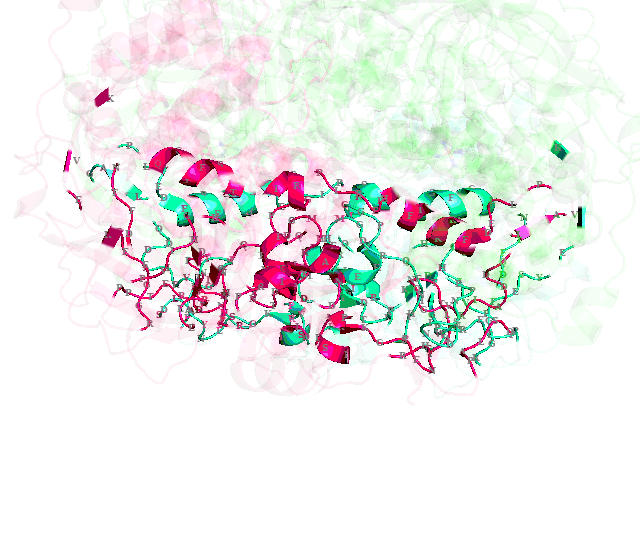

3p9r_B_D:


2024-06-24 17:37:32.240 Python[47188:5686865] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


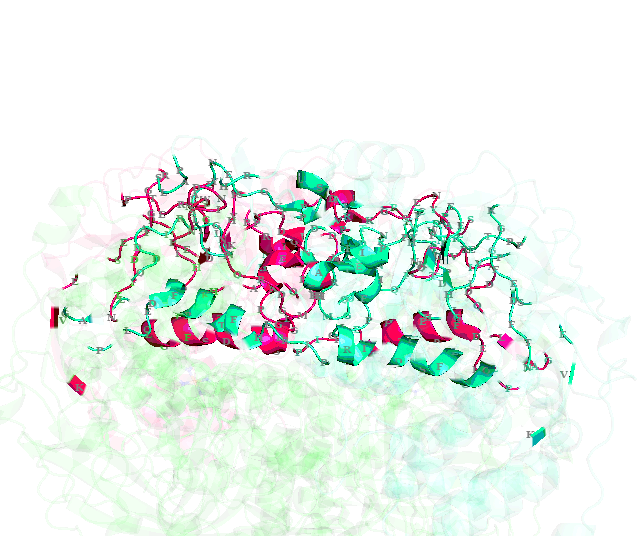

8atd_A_C:


2024-06-24 17:37:36.315 Python[47194:5686938] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


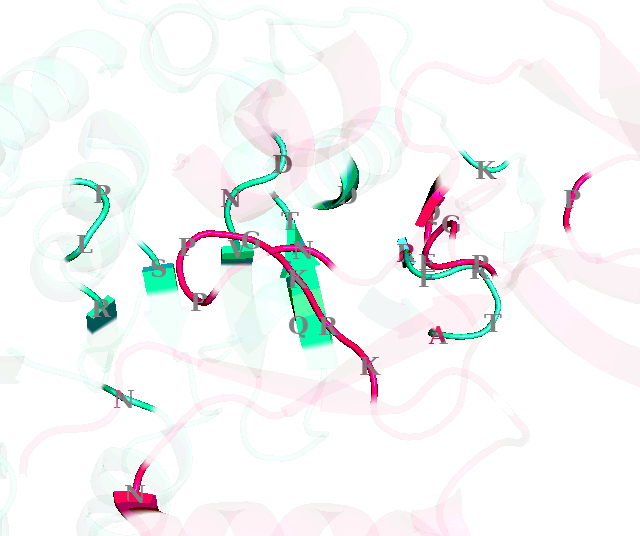

8atd_B_D:


2024-06-24 17:37:38.707 Python[47201:5687016] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


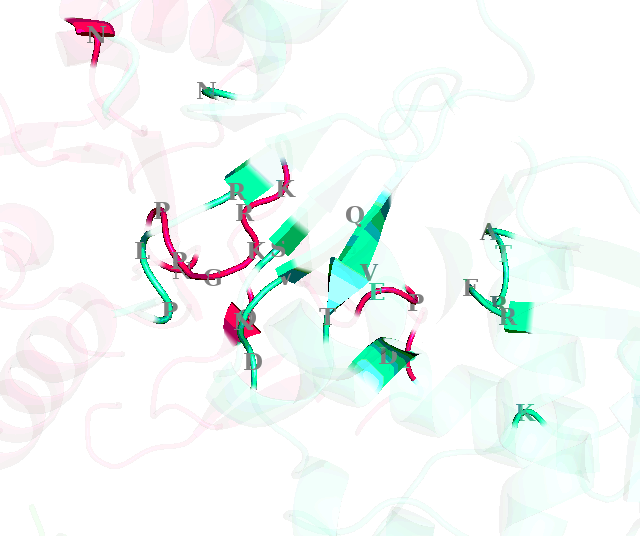

10gs_A_B:


2024-06-24 17:37:41.096 Python[47206:5687064] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


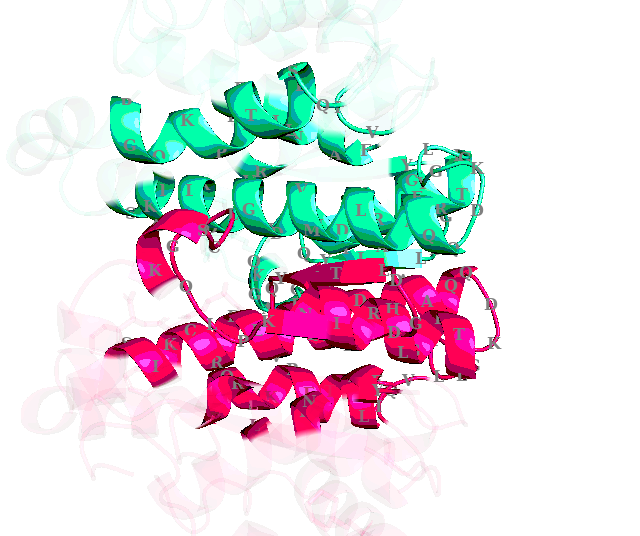

In [3]:
ppis = [
    PPIREF_TEST_DATA_DIR / 'ppi/1p7z_A_C.pdb',
    PPIREF_TEST_DATA_DIR / 'ppi/3p9r_B_D.pdb',
    PPIREF_TEST_DATA_DIR / 'ppi/8atd_A_C.pdb',
    PPIREF_TEST_DATA_DIR / 'ppi/8atd_B_D.pdb',
    PPIREF_TEST_DATA_DIR / 'ppi/10gs_A_B.pdb'
]

for ppi in ppis:
    ppi_id = ppi.stem
    swap_colors = ppi_id == '8atd_B_D'  # partners are swapped with respect to 8atd_A_C
    print(f'{ppi_id}:')
    display(PPI(ppi).visualize(swap_colors=swap_colors))

In [4]:
idist = IDist(max_workers=1)

# Embed all PPIs
idist.embed_parallel(ppis)

# Cluster
cluster_labels = idist.cluster_embeddings()

Embedding PPIs (1 processes):   0%|          | 0/5 [00:00<?, ?it/s]

[06/24/24 17:37:43] WARNING  To use the Graphein submodule      embeddings.py:34
                             graphein.protein.features.sequence                 
                             .embeddings, you need to install:                  
                             torch                                              
                             To do so, use the following                        
                             command: conda install -c pytorch                  
                             torch                                              
                    WARNING  To use the Graphein submodule      embeddings.py:45
                             graphein.protein.features.sequence                 
                             .embeddings, you need to install:                  
                             biovec                                             
                             biovec cannot be installed via                     
                            

Embedding PPIs (1 processes):  20%|██        | 1/5 [00:04<00:17,  4.32s/it]

[06/24/24 17:37:46] DEBUG    Deprotonating protein. This removes H graphs.py:188
                             atoms from the pdb_df dataframe                    
                    DEBUG    Detected 289 total nodes              graphs.py:435
                    INFO     Found: 83232 KNN edges             distance.py:1132
[06/24/24 17:37:47] INFO     Found: 83232 KNN edges             distance.py:1132


Embedding PPIs (1 processes):  40%|████      | 2/5 [00:06<00:09,  3.26s/it]

[06/24/24 17:37:49] DEBUG    Deprotonating protein. This removes H graphs.py:188
                             atoms from the pdb_df dataframe                    
                    DEBUG    Detected 31 total nodes               graphs.py:435
                    INFO     Found: 930 KNN edges               distance.py:1132
                    INFO     Found: 930 KNN edges               distance.py:1132
                    DEBUG    Deprotonating protein. This removes H graphs.py:188
                             atoms from the pdb_df dataframe                    
                    DEBUG    Detected 30 total nodes               graphs.py:435
                    INFO     Found: 870 KNN edges               distance.py:1132
                    INFO     Found: 870 KNN edges               distance.py:1132
                    DEBUG    Deprotonating protein. This removes H graphs.py:188
                             atoms from the pdb_df dataframe                    
                    DEBUG   

Embedding PPIs (1 processes): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


The clustering correctly grouped the near duplicates together:

In [5]:
dict(zip(idist.get_embeddings().index, cluster_labels))

{'1p7z_A_C': 2, '3p9r_B_D': 2, '8atd_A_C': 0, '8atd_B_D': 0, '10gs_A_B': 1}